# Urban Computing - Lab 1
This lab introduces Python for scientific programming, shows you examples on how to handle API access and visualization for location information.  We assume knowledge in handling numpy, pandas dataframes and matplotlib for this course. Make sure you familiarize yourself before the first assignment is due. 

This lab contains three parts: 

- Part I Numpy and basic scientific programming
- Part II Maps: OpenRoute Service and Folium
- Part III Foursquare API and pandas dataframes
    

### Part I  Numpy and basic scientific programming

#### Loop Plot
The code below constructs a live-plot visualization inside a for-loop. <br>
It gradually draws $x$,$y$ data points derived from the following trigonometric equations: $$x(t)=t-1.6\cdot cos(24t)\\y(t)=t-1.6\cdot sin(25t)$$ where $t \in \{0.01, 0.02, 0.03, ..., 0.18\}$<br>
Try to change some of the parameters (e.g. `hi_b`, `lo_b`,...) and see the differences.  

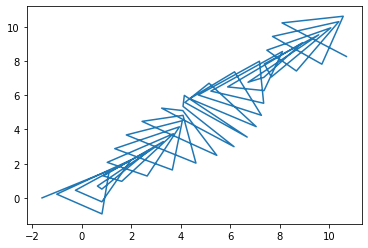

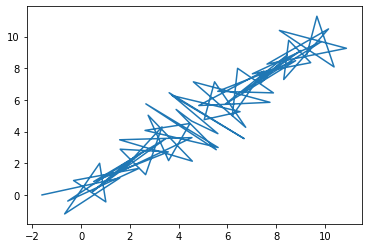

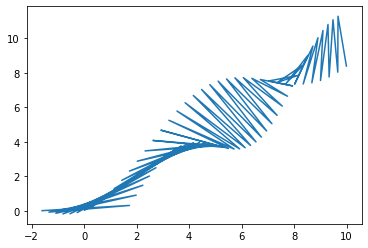

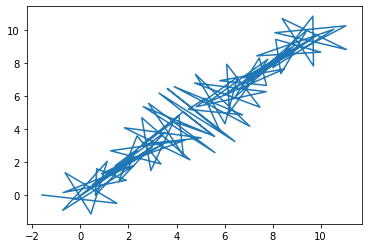

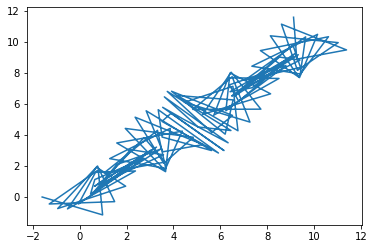

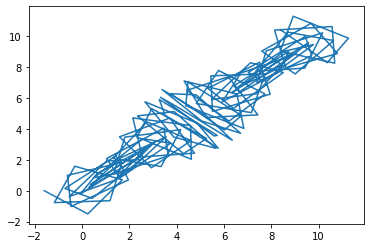

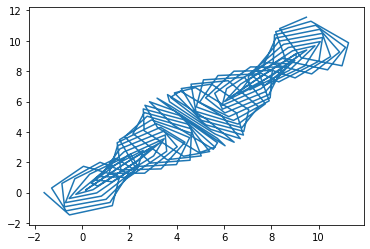

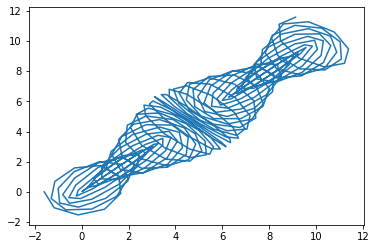

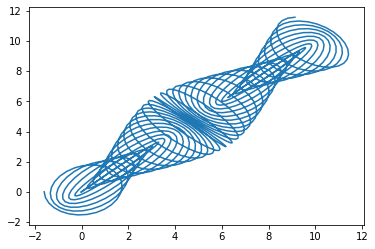

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def fx(t):
    return t - 1.6*np.cos(24*t)

def fy(t):
    return t-1.6*np.sin(25*t)

# Step Parameters for vector t
hi_b = 0.18
lo_b = 0.01
by = 0.02
step = np.arange(lo_b,hi_b, by)
step = np.flip(step, axis=0)

# Live-Plot inside the for-loop
for st in step:
    t = np.arange(0,10,st)
    x = fx(t)
    y = fy(t)
    plt.figure()
    plt.plot(x,y)
    plt.pause(0.4)
plt.show()
    

### Exercise 1 - Plots
Use the previous information and visualize your own live-plot using the following trigonometric equations:
$$x(u) = sin(33u)cos(9u)\\
y(u) = sin(40u)sin(7u)$$<br>
A correct final image, if everything was written correctly, is something like the following: <img src="plt.png">

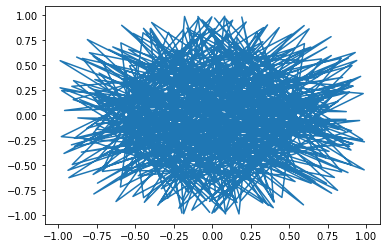

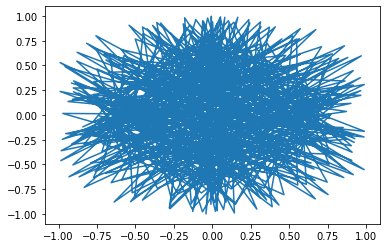

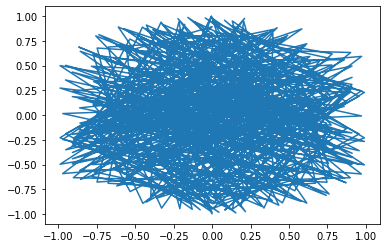

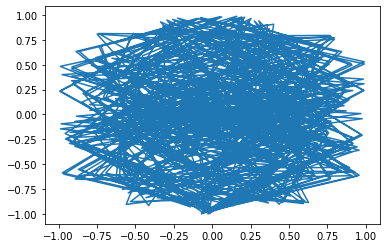

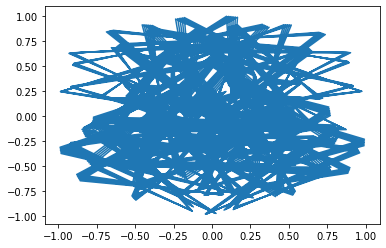

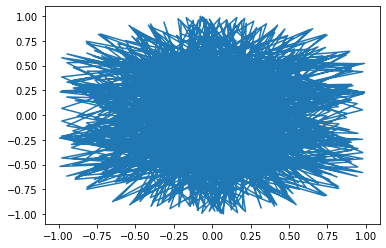

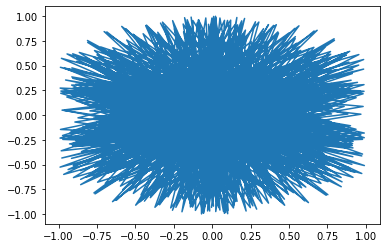

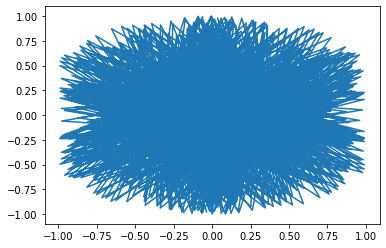

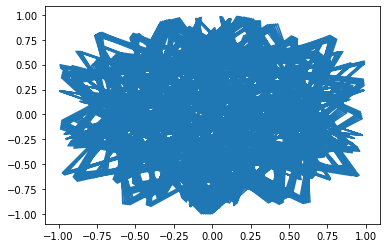

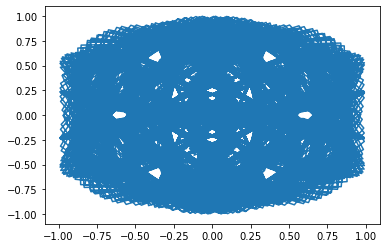

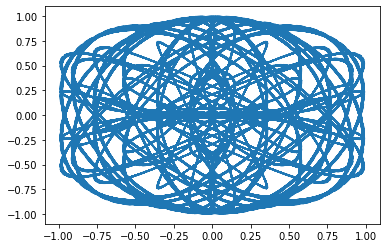

<Figure size 432x288 with 0 Axes>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# Function for generating x(u)
# Code here:
def fx(t):
    return np.sin(33*t)*np.cos(9*t)

#Function for generating y(u)
def fy(t):
    return np.sin(40*t)*np.sin(7*t)

# Generate vector u

# Step Parameters for vector t
hi_b = 0.22
lo_b = 0.01
by = 0.02
step = np.arange(lo_b,hi_b, by)
step = np.flip(step)

# Live-Plot inside the for-loop
for st in step:
    t = np.arange(0,100,st)
    x = fx(t)
    y = fy(t)
    plt.figure()
    plt.plot(x,y)
    plt.pause(0.4)
plt.figure()
#
#
#

### Part II  Maps: OpenRoute Service and Folium 

#### Download APIs for Python
- #### Some basic API's: 
    - Install the `openrouteservice` [(documentation)](https://pypi.org/project/openrouteservice/) library. The current package provides a functional python-API for requesting geographical data directly from openrouteservice. You will have to create an account and get the API_KEY in order to be able to work with this library. You can find more information in the website [openrouteservice.org](https://openrouteservice.org/services/) where you can also create such an account, read the documentation and play around with online data request forms.

    - The second library is called `folium` and it provides API for map visualization. You can download it from [pypi.org/project/folium](https://pypi.org/project/folium/).

    - Please keep in mind that Anaconda users have to follow specific instructions for their anaconda-python-distribution for any package installation.

 - #### Using `openrouteservice`
     - Import the library, provide some coordinates and request the route. 
     - Try to understand the content of the routes dictionary 
     - Note that always we have to provide the api_key when we generate a client

In [3]:
#!pip install openrouteservice 
import openrouteservice as opn
from openrouteservice.directions import directions
api_key='5b3ce3597851110001cf624871534e9a8b664afba7c805c088868a69'
coords = ((8.34234,48.23424),(8.34423,48.26424))

client = opn.Client(key=api_key) # Specify your personal API key
routes = directions(client, coords) 
routes

{'bbox': [8.327707, 48.231946, 8.345244, 48.263552],
 'info': {'attribution': 'openrouteservice.org | OpenStreetMap contributors',
  'engine': {'build_date': '2020-01-16T14:21:32Z', 'version': '6.0.0'},
  'query': {'coordinates': [[8.34234, 48.23424], [8.34423, 48.26424]],
   'elevation': False,
   'geometry': True,
   'geometry_format': 'encodedpolyline',
   'instructions': True,
   'instructions_format': 'text',
   'language': 'en',
   'preference': 'fastest',
   'profile': 'driving-car',
   'units': 'm'},
  'service': 'routing',
  'timestamp': 1582270577462},
 'routes': [{'bbox': [8.327707, 48.231946, 8.345244, 48.263552],
   'geometry': 'mtkeHuv|q@~@VLHz@\\PR|@hBt@j@^n@L\\NjALv@Jh@NXi@zBm@jCKTy@z@qAhBa@\\[Ne@DgCc@i@?[Ty@hAi@zASRi@R}@H_@N[b@kAdCy@`Au@d@eA|@q@h@WRe@PYHYBqADgAAcAL_A^w@~@q@`@w@Zw@Cm@K[PeA|Aa@p@g@fAiAhBuAv@]VU^k@xAUXe@TqATy@V}@f@_@V[MUWqA_FKy@Me@_@cAu@{Ae@c@aAfBaAv@g@rBm@|@w@x@m@^U@m@Ma@SI\\mAlEkAjC_AjC_ApCe@z@i@j@q@f@WLwAr@u@T}A\\wATU?WCs@[oA]]EmACUCg@SMaAi@mDQm@K}@Mq@

- #### Decode a PolyLine
The output of the `.directions` object is a json file by default. We can decode it to a simple dictionary which, in this case, is a GeoJSON-ready. We can simply do the following:

In [4]:
import openrouteservice as opn
from openrouteservice.directions import directions
from openrouteservice import convert

api_key='5b3ce3597851110001cf624871534e9a8b664afba7c805c088868a69'
coords = ((8.34234,48.23424),(8.34423,48.26424))

client = opn.Client(key=api_key) # Specify your personal API key

# decode_polyline needs the geometry only
geometry = client.directions(coords)['routes'][0]['geometry']

decoded = convert.decode_polyline(geometry)

decoded # this has only the coordinates for the route.

{'coordinates': [[8.34427, 48.23383],
  [8.34415, 48.23351],
  [8.3441, 48.23344],
  [8.34395, 48.23314],
  [8.34385, 48.23305],
  [8.34332, 48.23274],
  [8.3431, 48.23247],
  [8.34286, 48.23231],
  [8.34271, 48.23224],
  [8.34233, 48.23216],
  [8.34205, 48.23209],
  [8.34184, 48.23203],
  [8.34171, 48.23195],
  [8.34109, 48.23216],
  [8.34039, 48.23239],
  [8.34028, 48.23245],
  [8.33998, 48.23274],
  [8.33945, 48.23315],
  [8.3393, 48.23332],
  [8.33922, 48.23346],
  [8.33919, 48.23365],
  [8.33937, 48.23433],
  [8.33937, 48.23454],
  [8.33926, 48.23468],
  [8.33889, 48.23497],
  [8.33843, 48.23518],
  [8.33833, 48.23528],
  [8.33823, 48.23549],
  [8.33818, 48.2358],
  [8.3381, 48.23596],
  [8.33792, 48.2361],
  [8.33725, 48.23648],
  [8.33692, 48.23677],
  [8.33673, 48.23704],
  [8.33642, 48.23739],
  [8.33621, 48.23764],
  [8.33611, 48.23776],
  [8.33602, 48.23795],
  [8.33597, 48.23808],
  [8.33595, 48.23821],
  [8.33592, 48.23862],
  [8.33593, 48.23898],
  [8.33586, 48.23932],
  

- #### Visualize the maps
    - Import `folium` library
    - Get familiar using the [link](https://python-visualization.github.io/folium/quickstart.html)
    - Try to plot a map using the the coordinates: 52.169709,4.457111 
    - Is the place on the map familiar to you?

In [2]:
import folium
# Set up folium map
map1 = folium.Map(location=([52.169709,4.457111]), zoom_start=17)
map1

- #### Visualize specific locations
    1. Plot the map around the previous location
    2. Specify University Buildings
    3. Request isochrones within some minutes walking from each building
    4. Draw the radius of isochrones (note the reversed coordinates)

In [3]:
import openrouteservice as opn
import folium

clnt = opn.Client(key= '5b3ce3597851110001cf624871534e9a8b664afba7c805c088868a69') # Specify your personal API key
# 1. Map
map1 = folium.Map(location=([52.169709,4.457111]), zoom_start=16)

# 2. Set up the building dictionary with real coordinates
bld_dict = {'Archeologie': {'location': [4.464366,52.165078]},
            'Gorlaeus': {'location': [ 4.459992, 52.167412]},
            'Jansen': {'location': [4.455754,52.167730]},
            'Chemistry': {'location': [4.459306,52.168101]}
           }

# 3. Request of isochrones with 2 minute footwalk.
params_iso = {'profile': 'cycling-road',
              'intervals': [120], # 120/60 = 2 mins
              'segments': 120,
              'attributes': ['total_pop'] # Get population count for isochrones
             }

# 4. Add the isochrones to the map and visualize it
for name, bld in bld_dict.items():
    params_iso['locations'] = [bld['location']] # Add buildings coords to request parameters
    bld['iso'] = clnt.isochrones(**params_iso) # Perform isochrone request
    folium.features.GeoJson(bld['iso']).add_to(map1) # Add GeoJson to map
    
    folium.map.Marker(list(reversed(bld['location'])), # reverse coords due to folium syntax:Latitude/Longitude of Map (Northing, Easting).
                      icon=folium.Icon(color='lightgray',
                                        icon_color='#cc0000',
                                        icon='home',
                                        prefix='fa',
                                       ),
                      popup=name,
                 ).add_to(map1) # Add apartment locations to map

map1

- #### Simulating trajectories of horseback riders
Near LIACS, on the Wassenaarseweg, there are stabels where children go for horseback riding. Here, we would like to simulate the daily rounds that the horses do. Such simulations can help when assessing how robust algorithms are to noise or how well they can extract subtrajectories. 
While there are other ways to get an object with timestamped longitudes and latitutes, we are presenting here a basic version. Feel free to increase the difficulty or add more cycles (i.e. additional daily or weekly trajectories) as you wish.

The only movement that the horses do is one round in the park, the rest of the time, they stay in the stables. There are two locations in the park where the children will take a break and have a snack for 30 min. 


In [10]:

import openrouteservice as opn
from openrouteservice.directions import directions
from openrouteservice import convert
import numpy as np


#A) coordinates of the stables and the two picnic sites:

coords_ridingschool    = [4.467626, 52.170207]

coords_corner_one      = [4.474798, 52.172679]

coords_corner_two      = [4.475071, 52.169961]


#B) get the circuit from open route services:

api_key='5b3ce3597851110001cf624871534e9a8b664afba7c805c088868a69' #see Exercise above on how to get the trajectories
coords = (coords_ridingschool,coords_corner_one, coords_corner_two)

client = opn.Client(key=api_key) # Specify your personal API key

# decode_polyline needs the geometry only
geometry = client.directions(coords)['routes'][0]['geometry']

decodedCircuit = convert.decode_polyline(geometry)



#C)Creating an object with timestamped long/lat

# Say it takes 20 min (the children are very slow) to get from one fix point to the next: 
# Remember that the break times are 30 min long

#explicit code:
leg_one = (coords_ridingschool,coords_corner_one)
leg_two = (coords_corner_one, coords_corner_two)
leg_three = (coords_corner_two, coords_ridingschool)

geom_one = client.directions(leg_one)['routes'][0]['geometry']
leg_one_decoded = convert.decode_polyline(geom_one)

geom_two = client.directions(leg_two)['routes'][0]['geometry']
leg_two_decoded = convert.decode_polyline(geom_two)

geom_three = client.directions(leg_three)['routes'][0]['geometry']
leg_three_decoded = convert.decode_polyline(geom_three)


#C)Creating an object with timestamped long/lat

#get indices and filter evenly as many locations as we need to fit the timestamps:
indices_one = np.round(np.linspace(0,len(leg_one_decoded['coordinates']) , 19))
indices_two = np.round(np.linspace(0,len(leg_two_decoded['coordinates']) , 19))
indices_three = np.round(np.linspace(0,len(leg_three_decoded['coordinates']) , 19))

##extract long and lat from coordinates
x  = leg_one_decoded ['coordinates']
lon = [z[0] for z in x]
lat = [z[1] for z in x]
 
lon_first_leg = np.asarray(lon)[indices_one.astype(int)- 1]
lat_first_leg = np.asarray(lat)[indices_one.astype(int)- 1]

#add rest time
#long/ lat for first break
lon_rest_one = 4.474798
lat_rest_one =  52.170207
lon_first_break = np.repeat(lon_rest_one, 30)
lat_first_break = np.repeat(lat_rest_one, 30)



#create on vector with lat, one with long and the complete timestamps:

vec_long = np.append(lon_first_break, lon_first_leg )
vec_lat = np.append(lat_first_break, lat_first_leg )

timestamps_first_leg_plus_break = np.linspace(0,50,49)


#Stuff to work out yourself:
### do this for the rest of the legs and fuse into one object
### add hours of the day to the timestamps, decide yourself when the kids are starting their class

#D) Fill the rest of the day with "Staying at stables"

#E) Can you visualize the trajectory? (see answers below for help with folium)

#F) How would you add noise to the trajectory? What kind of noise could occur?



### Part III  Foursquare API and pandas dataframes

- ####  Foursquare API
Visit [foursquare](https://developer.foursquare.com/places-api) site and create a developer free account. Start an app and install [foursquare-python-API](https://pypi.org/project/foursquare/) by typing on a terminal: ``` pip install foursquare```, or download it from the site. 

The following block of code provides some information about how to use `foursquare-API` in python. All you need is to create a developer's account and connect it using the `client_id` and `client_secret` hash from your application in [foursquare](https://developer.foursquare.com/places-api). Then, you create a client object and use it for data request. Please have a look at the [foursquare-documentation](https://developer.foursquare.com/docs).<br>
The specific example requests all bars in specific radius from the Leiden center.

In [13]:
import foursquare as fsq

# Please copy paste your client_id and client_secret from your web foursquare-app
cl_id='TLE3F5Q4JLFJZKBXMDUGLRG5AVTDTYU1YIESEOXRVPYIPX23'
cl_sec='YLXYQ55ZBSQZAYBHD1LD5EUFCQODSSOQXHERYFPVBN0MTR24'

# Construct the client object
client = fsq.Foursquare(client_id=cl_id, client_secret=cl_sec)

# Make a request
## Request specificaly for venues near the center of Leiden  
### ll     --> latitude/longitude
### query  --> type of venue 
### intent --> intent performing search
### radius --> Limit results to venues within this
### limit  --> Number of results to return, up to 50
data = client.venues.search(params={'ll': '52.160236, 4.497012', 'query': 'bar', 
                                    'intent': 'browse', 'radius':300, 'limit':50})
print('Bars near my house: ' + str(len(data['venues'])))

Bars near my house: 3


#### Exercise 2 - Foursquare
#### a. Index the requested dictionary and convert it into a pandas DataFrame
1. Request from foursquare all possible venues within 3000 meters radius of the Leiden city center. Find the coordinates of Leiden Center from google-maps or any other map application.
2. Make a function which takes a dictionary as input.
2. Index the dictionary and get interesting information.
3. Make a DataFrame from that dictionary with the following information in columns: name, latitude, longitude, distance, address, genre (pluralName).
4. You noticed that in many cases some of the information is missing. Make sure that your DataFrame is loaded with the correct information from the dictionary where it was possible, anywhere else fill in with 'NA'. 
5. Return the dataframe.

In [12]:
import pandas as pd
import foursquare as fsq

# Please copy paste your client_id and client_secret from your web foursquare-app
cl_id='TLE3F5Q4JLFJZKBXMDUGLRG5AVTDTYU1YIESEOXRVPYIPX23'
cl_sec='YLXYQ55ZBSQZAYBHD1LD5EUFCQODSSOQXHERYFPVBN0MTR24'

# Construct the client object
client = fsq.Foursquare(client_id=cl_id, client_secret=cl_sec)

# Use your Client and request data from foursquare
data = client.venues.search(params={'ll': '52.159536, 4.491366', 'query': 'bar', 
                                    'intent': 'browse', 'radius':3000, 'limit':50})

# Build a function
def venue_scraper(data):
    print(len(data['venues']))
    d = {'name' : [], 'lat':[], 'lng': [], 'dist': [], 'address': [], 'genre': []}
    for i in range(len(data['venues'])):
        d['name'].append(data['venues'][i]['name'])
        d['lat'].append(data['venues'][i]['location']['lat'])
        d['lng'].append(data['venues'][i]['location']['lng'])
        d['dist'].append(data['venues'][i]['location']['distance'])
        if 'address' in data['venues'][i]['location'].keys():
            d['address'].append(data['venues'][i]['location']['address'])
        else:
            d['address'].append('NA')
        if data['venues'][i]['categories'] != []:
            d['genre'].append(data['venues'][i]['categories'][0]['pluralName'])
        else:
            d['genre'].append('NA')
    df = pd.DataFrame.from_dict(d)
    return d, df
        
di, df=venue_scraper(data)                                        
df        
        
  
    

50


,name,lat,lng,dist,address,genre
0,M Noodle Bar,52.162870,4.484963,573,Beestenmarkt 4,Noodle Houses
1,Cosmo Blow Dry Bar,52.159146,4.490836,56,Aalmarkt 22,Salons / Barbershops
2,Bar-Dancing De Kroon,52.163177,4.494783,467,Langegracht 65,Gay Bars
3,Rooftop Bar,52.164953,4.488021,644,NA,NA
4,Ocean Bar (Holiday Inn),52.163967,4.456371,2440,NA,Hotel Bars
5,Bar Lokaal,52.157281,4.494333,322,NA,Bars
6,The Garden Grill & Bar,52.169912,4.453280,2845,Willem Einthovenstraat 3,Hotel Bars
7,Takkie Apres ski Bar,52.159441,4.491379,10,NA,NA
8,Vi-kings Bar,52.160225,4.483472,544,Noordeinde 28,Sports Bars
9,Hudson Bar & Kitchen,52.163390,4.486174,556,Nieuwe Beestenmarkt 15-21,American Restaurants


#### b. Count the frequencies of the different venue types (genres)
Search in [pandas-documentation](https://pandas.pydata.org/pandas-docs/stable/reference/index.html) and try to answer the following:
1. Count the frequencies of each venue-type.
2. Count the number of NA values.
3. Find the nearest venue in the center of Leiden.
4. Find the most distant venue from the center.

In [14]:
# Count frequencies
x= df.groupby(['genre']).size()
print('Frequencies of Venue-Types\n\n' + str(x))

# Find NA and count their frequencies
NA_count = x['NA']
print('\nFrquency of NA: ' + str(NA_count))

# Nearest venue
near_venue=df.loc[df['dist']==min(df['dist']), ['name']].iloc[0]['name']
# Distant venue
far_venue=df.loc[df['dist']==max(df['dist']), ['name']].iloc[0]['name']

print('\nClosest Venue: ' + str(near_venue) + '\nDistant Venue: ' + str(far_venue))

Frequencies of Venue-Types

genre
American Restaurants                            1
Art Galleries                                   1
Bars                                           11
Beer Gardens                                    1
Business Services                               1
Cafés                                           1
Castles                                         1
Coffee Shops                                    1
Construction & Landscaping                      2
Delis / Bodegas                                 1
Doctor's Offices                                1
Dutch Restaurants                               1
Fraternity Houses                               1
Gay Bars                                        1
Gyms                                            1
Hotel Bars                                      2
Hotels                                          1
Italian Restaurants                             2
NA                                              4
Nightclubs      

#### c. Visualize Frequencies 
Plot a barplot for venue-types (genre), using pandas and matplotlib, only for frequencies which are:
$\text{genre}\geq2$. Barplots are suitable graphs for frequencies visualization but this is not the only way. Find another proper way to visualize those frequencies.


<Figure size 432x288 with 0 Axes>

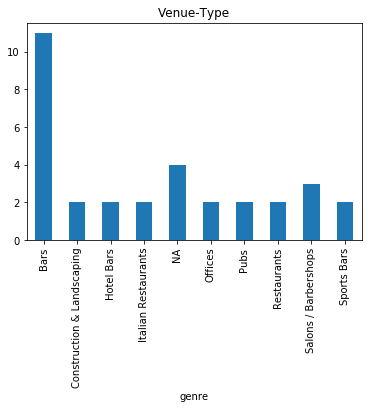

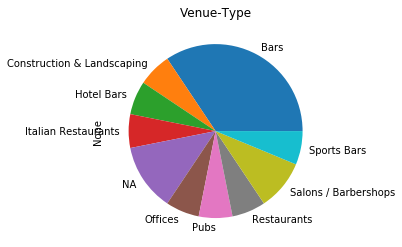

In [15]:
x= df.groupby(['genre']).size()

# Query the dataframe for values bigger or equal than 2
x= x[x>=2]

# Plot bar
plt.figure()
x.plot(kind='bar',title='Venue-Type')
plt.show()

# Plot pie
plt.figure()
x.plot(kind='pie', title='Venue-Type')
plt.show()




#### d. Visualize locations in maps
Use all previous information and draw pins for all venues in the center of leiden.<br>
Open a map using folium and initialize it with Leiden center coordinates: 52.159536, 4.491366.<br> Then, plot all the venues from the dataframe.

In [16]:
import folium
# Make a list with the coordinates of each location
locations = df[['lat', 'lng']]
locationlist = locations.values.tolist()

# Open a map and initialize it with the coordinates
map = folium.Map(location=[52.159536, 4.491366], zoom_start=15)
# add to the map all different locations
# use the parameter 'popup=' to include the name of each venue
for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], popup=df['name'][point]).add_to(map)
map